In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#Datos de Diabetes
datos_diabetes = pd.read_csv('/home/juan/machineLearning2025/datasets/diabetes_012_health_indicators_BRFSS2015.csv')

datos_diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Informacion de los datos:

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dataset desvalanceado

Diabetes_012 -> 0 no diabetes, 1 prediabetes, 2 diabetes

HighBP-> Hipertension

HighChol -> COlesterol alto

CholCheck-> Chequeo de colesterol los ultimos 5 a;os

BMI -> Indice de masa corporal

Smoker ->Ha fumado al menos 100 cigarrros en su vida

Stroke -> Derrame cerebral

HeartDiseaseorAttack -> infarto coronario o infarto al miocardio

PhysActivity -> Actividad fisica los ultimos 30 dias

Fruits -> Consume al menos 1 fruta al dia

Veggies -> Consume vegetales al menos 1 vez al dia

HvyAlcoholConsump -> Hombres que toman mas de 14 bebidas alcoholicas por semana, mujeres mas de 7

AnyHealthcare-> Tiene algun seguro medico

NoDocbcCost-> En el ultimo a;o, no visito a un doctor debido a no poder costear los servicios medicos.

GenHlth -> OPinion de salud general, tu salud general es? Escala 1-5.

MentHlth -> Por cuantos dias durante el ultimo mes (1-30) no tuviste una salud buena?

PhysHlth -> Por cuantos dias durante el ultimo mes (1-30) tu salud no fue buena?

DiffWalk -> TIenes dificultades para caminar o subir escaleras?

Sex -> 0=Femenino, 1= Masculino

Age ->  escala del 1-13, 1= 18-24, 9=60-64, 13=80 o mayores

Education -> escala del 1-6, 1=nunca fue a la escuela o solo kinder, 2=grados 1-8, 3= grados 9-11, 4= grado 12 o graduados de HIgh school, 5= 1-3 de universidad, 6= 4 o mas a;os de universidad

Income -> escala 1-8 1= menos de 10,000, 5= menos de 35,000, 8=75,000 o mas


In [3]:
#Unificar prediabetes y diabetes

datos_diabetes['Diabetes_012'] = datos_diabetes['Diabetes_012'].replace(2,1)

datos_diabetes = datos_diabetes.rename(columns={'Diabetes_012':'diabetes'})

In [4]:
# mostrar información del DataFrame
def info(df):
    print('Duplicated: ',df.duplicated().sum())
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))

info(datos_diabetes)

Duplicated:  23968
Null values %:
diabetes                0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


In [5]:
datos_diabetes.drop_duplicates(inplace=True)

datos_diabetes.dtypes

diabetes                float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
#Definicion de datos enteros.
datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income' ]] = datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income']].astype(int)

#Definicion de datos booleanos.
for col in datos_diabetes.columns:
    if datos_diabetes[col].dtype == 'float64':
        datos_diabetes[col] = datos_diabetes[col].astype(bool)


#Ver balanceo de la clase objetivo
porcentaje = 100*datos_diabetes['diabetes'].value_counts()/len(datos_diabetes)
print(porcentaje.astype(str) + '%')

diabetes
0    82.73620881799819%
1    17.26379118200181%
Name: count, dtype: object


<Axes: >

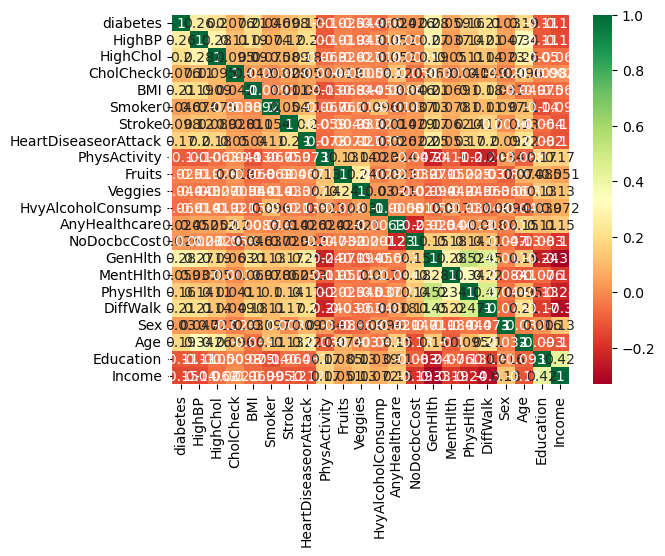

In [16]:
import seaborn as sns
correlacion = datos_diabetes.corr()

correlacion

sns.heatmap(correlacion, annot=True, cbar=True, cmap="RdYlGn")

<Axes: >

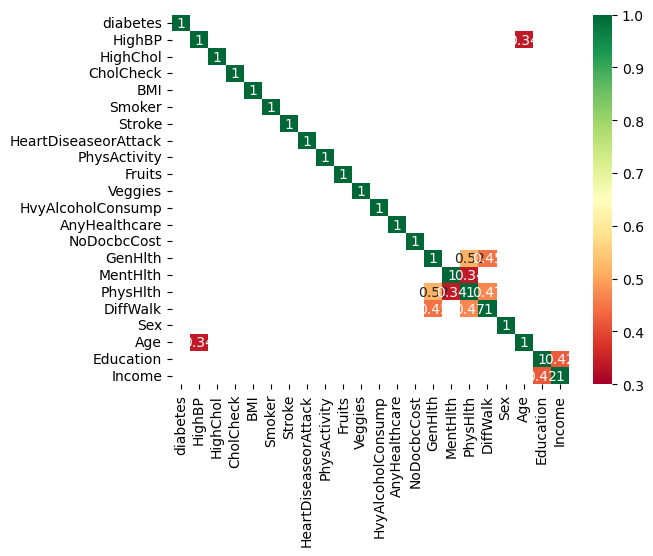

In [ ]:

rango_min = 0.3
rango_max = 1

# Aplicar filtro
filtro = (correlacion >= rango_min) & (correlacion <= rango_max)
correlacion_filtrada = correlacion.where(filtro)

# matriz de correlación filtrada
sns.heatmap(correlacion_filtrada, annot=True, cbar=True, cmap="RdYlGn", vmin=rango_min, vmax=rango_max)